In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('AirPassengers.csv')
print(data.shape)
data.head(3)

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [32]:
#converting month to datetime type and setting it as index for time series
data['Month'] = pd.to_datetime(data['Month'])

In [33]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [34]:
data.set_index("Month",inplace=True)
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


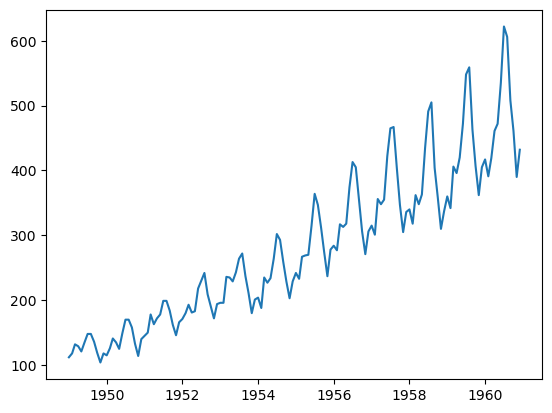

In [35]:
plt.plot(data)
plt.show()

In [36]:
# this data has trends and it is non stationary but we require to test

## How to check Stationarity of Data in Python
1. ROLLING STATISTICs
2. Augmented Dickey- fuller Test (ADCF)

In [37]:
# rolling statistics

roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()
print(roll_mean,roll_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


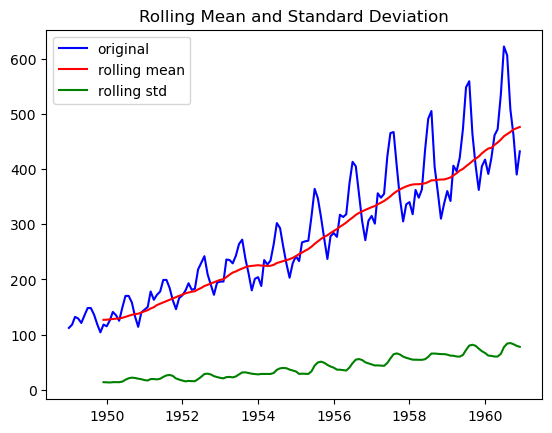

In [38]:
#plotting this data

plt.title("Rolling Mean and Standard Deviation")
plt.plot(data,color='blue',label='original')
plt.plot(roll_mean,color='red',label='rolling mean')
plt.plot(roll_std,color='green',label='rolling std')
plt.legend()

In [39]:
#mean and standard deviation is not constant. Hence the data is not stationary

## Adcf  test

In [40]:
from statsmodels.tsa.stattools import adfuller


In [41]:
#this code I used from the blog

print("Observations of Dickey-fuller test")
dftest = adfuller(data['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


In [42]:
dftest

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [43]:
len(dftest)

6

In [44]:
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In this case, the test statistic (0.815369) is greater than the critical values at all significance levels (1%, 5%, and 10%). Additionally, the p-value (0.991880) is higher than the significance level of 0.05. Therefore, based on the ADF test results, we fail to reject the null hypothesis, indicating that the data is likely non-stationary.

In summary, the ADF test suggests that the data in this case is non-stationary.

### How to determine using ADCF that data is Stationary or Non-Stationary
    1. the test statistic would be lower than the critical values, and the p-value would be less than the significance               level (e.g., 0.05), indicating stationarity.
    
    Example ADF test result for stationary data:

    Test Statistic: -3.123
    p-value: 0.023
    Critical Values: The test statistic is lower than the critical values at all significance levels.
    
    
    
    
    2. When applying the ADF test to this data, the test statistic would be higher than the critical values, and the p-value          would be higher than the significance level, indicating non-stationarity.
    
    Example ADF test result for non-stationary data:

    Test Statistic: 1.872
    p-value: 0.998
    Critical Values: The test statistic is higher than the critical values at all significance levels.
    
    
    In summary, stationary data would have a lower test statistic and a p-value lower than the significance level, while non-stationary data would have a higher test statistic and a p-value higher than the significance level. These are general examples, and the actual interpretation depends on the specific dataset and significance level chosen.

## MAKING TIME SERIES STATIONARY IN PYTHON

     THERE ARE three methods
     
     1. Differencing
     2. Transformation
     3. Rolling Statistics

# METHOD 1 - DIFFERENCING
y(t) = y(t) - y(t-1)

<AxesSubplot: xlabel='Month'>

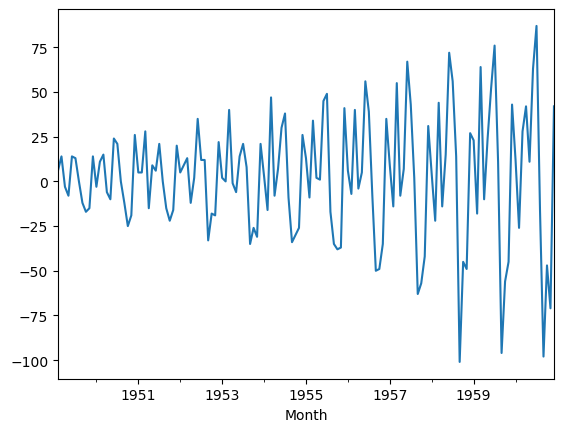

In [45]:
data['#Passengers_diff'] = data['#Passengers'] - data['#Passengers'].shift(1)
data['#Passengers_diff'].dropna().plot()

# METHOD 1A - DIFFERENCING
y(t) = y(t) - y(t-N)

In [46]:
 data['#Passengers_seasonal_difference'] = data['#Passengers'] - data['#Passengers'].shift(7)

<AxesSubplot: xlabel='Month'>

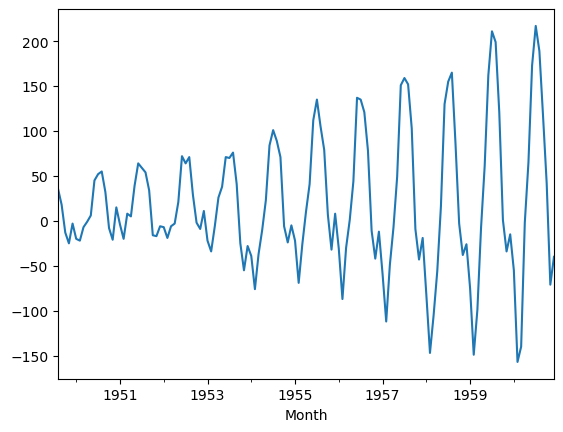

In [47]:
data['#Passengers_seasonal_difference'].dropna().plot()

## 2. LOG TRANSFORMATION

In [56]:
data1 = pd.read_csv('AirPassengers.csv')
#converting month to datetime type and setting it as index for time series
data1['Month'] = pd.to_datetime(data1['Month'])
data1.set_index("Month",inplace=True)

In [60]:
data1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot: xlabel='Month'>

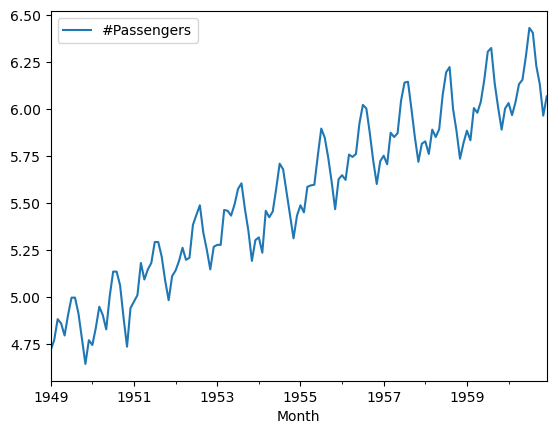

In [57]:
data_log = np.log(data1)
data_log.plot()

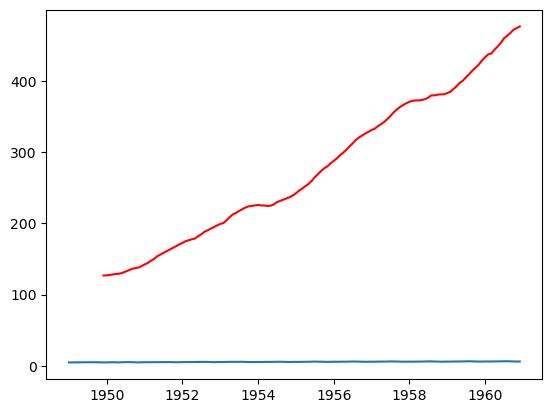

In [58]:
# rolling statistics

roll_mean1 = data_log.rolling(window=12).mean()
roll_std1 = data_log.rolling(window=12).std()
#print(roll_mean1,roll_std1)
plt.plot(data_log)
plt.plot(roll_mean,color='red')
plt.show()

In [61]:
#difference between log and moving average
datalogminusmovingaverage = data_log - roll_mean1
datalogminusmovingaverage.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [62]:
np.log(data1)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [63]:
data_log.rolling(window=12).mean()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,6.124517
1960-09-01,6.132246
1960-10-01,6.142628


In [64]:
#this code I used from the blog

print("Observations of Dickey-fuller test")
dftest = adfuller(data_log['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


C:\Users\Aishwarya\anaconda3\envs\analyticsvidhya\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


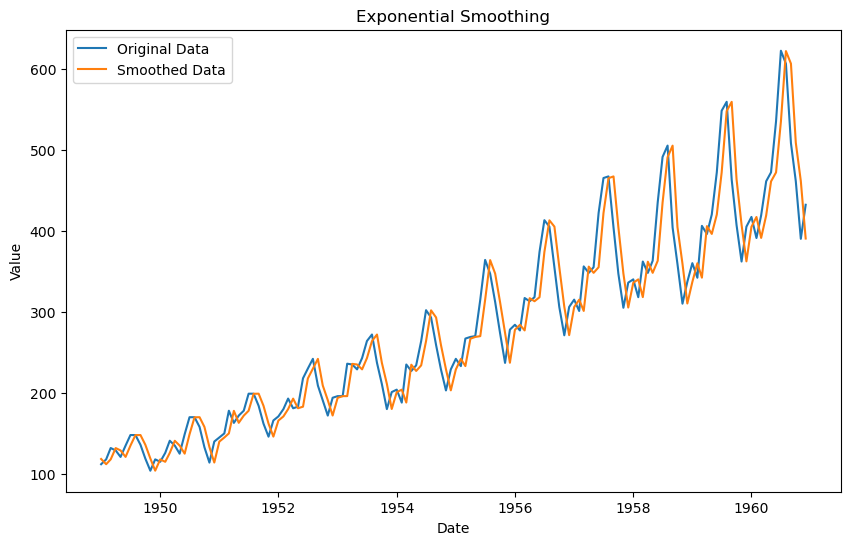

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data['#Passengers'])
smoothed_values = model.fit().fittedvalues

# Plot the original data and the smoothed data
plt.figure(figsize=(10, 6))
plt.plot( data['#Passengers'], label='Original Data')
plt.plot(smoothed_values, label='Smoothed Data')
plt.title('Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

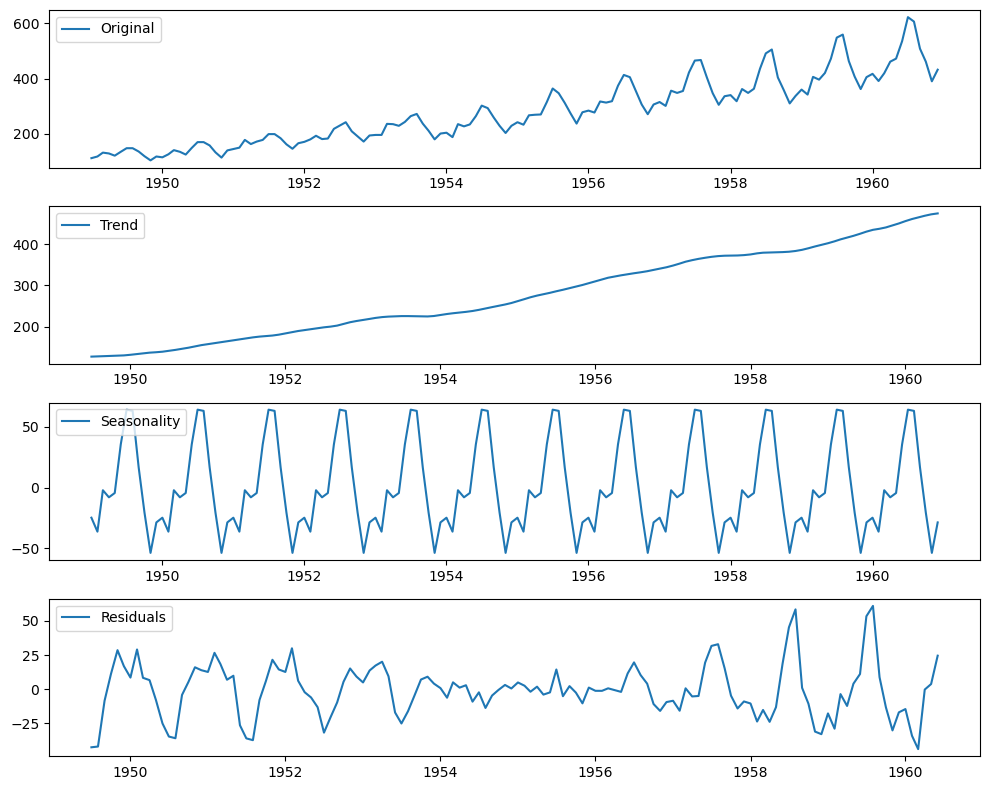

In [69]:
# Perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['#Passengers'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['#Passengers'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()